In [1]:
from strategies import Strategies
from process_data import Data_Handler
from download_data import download_data
from dateutil.relativedelta import relativedelta
from evaluate_strategy import calculate_returns, plot_all_strategies, plot_investment_rate, plot_individual_strategy_details
from tqdm import tqdm
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import warnings
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.set_option('display.float_format', lambda x: '%.3f' % x)
warnings.filterwarnings('ignore')
%matplotlib inline

# Download data

In [2]:
data  = download_data()

In [3]:
data.head(2)

,Date,Price,grouper,Dividend,CPI,Long_Interest_Rate_GS10,CAPE
0,1970-01-02,93.000,1970-01,3.163,37.800,7.790,17.091
1,1970-01-05,93.460,1970-01,3.163,37.800,7.790,17.091


In [4]:
data.tail(2)

,Date,Price,grouper,Dividend,CPI,Long_Interest_Rate_GS10,CAPE
12918,2021-03-19,3913.100,2021-03,NaN,262.413,1.450,35.025
12919,2021-03-22,3940.590,2021-03,NaN,262.413,1.450,35.025


# Plot time series

Visualize the initial data.

Text(0.5, 1.0, 'CAPE')

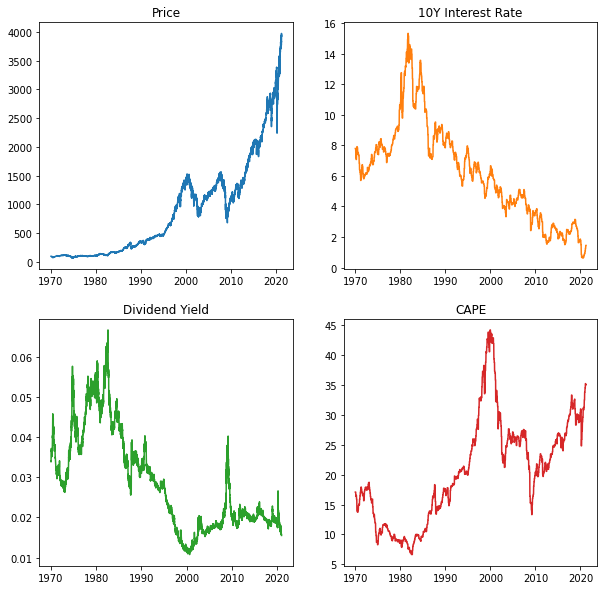

In [5]:
#Plotting using first dataframe.
fig, axs = plt.subplots(2, 2, figsize=(10,10))
axs[0, 0].plot(data.Date, data.Price)
axs[0, 0].set_title('Price')
axs[0, 1].plot(data.Date, data.Long_Interest_Rate_GS10, 'tab:orange')
axs[0, 1].set_title('10Y Interest Rate')
axs[1, 0].plot(data.Date, data.Dividend / data.Price, 'tab:green')
axs[1, 0].set_title('Dividend Yield')
axs[1, 1].plot(data.Date, data.CAPE, 'tab:red')
axs[1, 1].set_title('CAPE')

# Process data

In [6]:
#Initialize variables
starting_amount = 100_000
start = '1970-01-02'
end = data[data['Dividend'].isnull()].iloc[0]['Date'] #Last date
dividend_dates = [4,7,10,12]
capital_dates = [4, 12]
dividend_tax = 0.15           #15%
capital_tax = 0.15            #15%
capital_annual_yield = 0.001 #0.1%
annual_fund_fees = 0.00015   #0.15%

In [7]:
#Get backtesting data object
d = Data_Handler(data, starting_amount, start, end, dividend_dates, capital_dates, dividend_tax,
                 capital_tax, capital_annual_yield, annual_fund_fees)

# Create strategies

In [8]:
#Backtesting values
drop_pct_threshold = 0.2
rise_pct_threshold = 0.6
buy_pct = 0.4
sell_pct = 0.1

In [9]:
#Create backtesting data object.
strats = Strategies(d, drop_pct_threshold, rise_pct_threshold, buy_pct, sell_pct)

In [10]:
strats.run_strategies()

# Evaluation

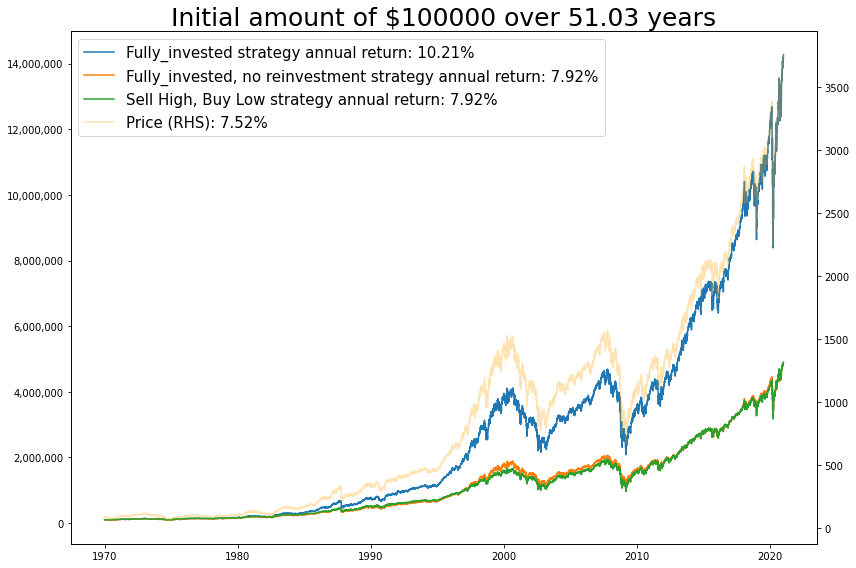

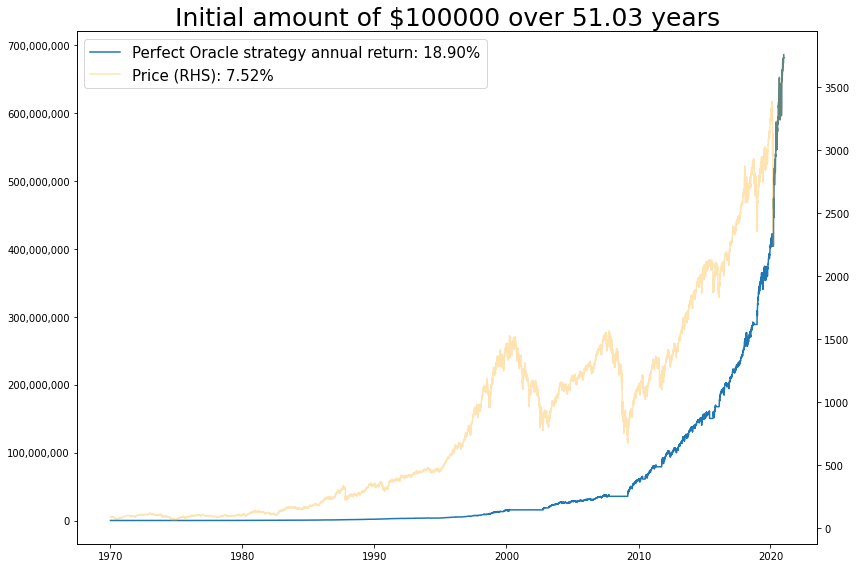

In [11]:
plot_all_strategies(strats)

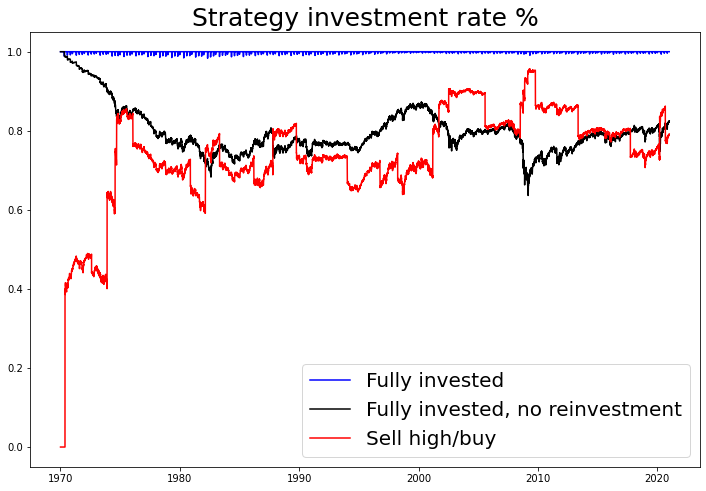

In [12]:
plot_investment_rate(strats)

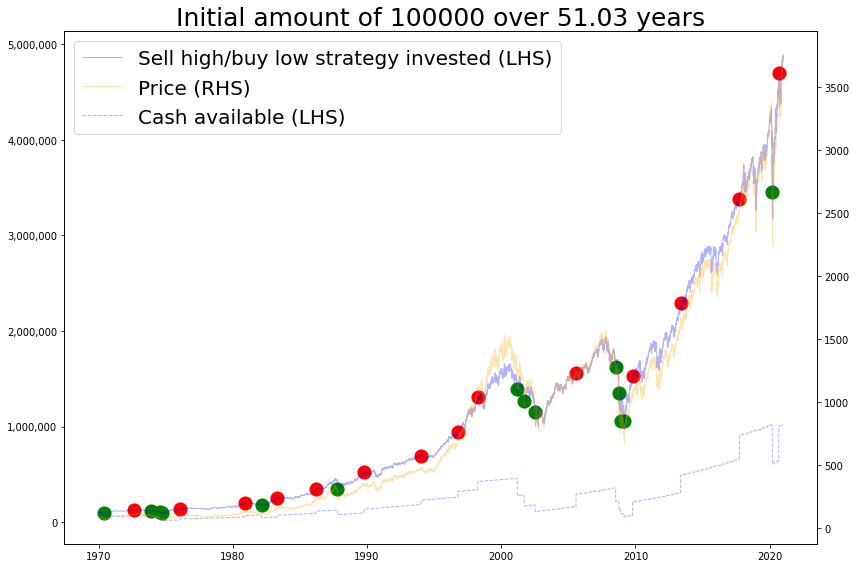

In [13]:
plot_individual_strategy_details(strats, starting_amount)

# Analyze returns with different starting dates

100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [05:21<00:00,  6.30s/it]


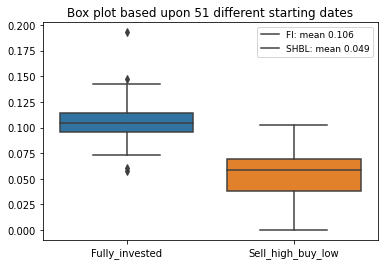

In [14]:
day_skip = 250
return_series = calculate_returns(day_skip)

In [15]:
return_series

,Fully_invested,Sell_high_buy_low
1970-01-02,0.101,0.077
1970-12-28,0.102,0.075
1971-12-22,0.102,0.077
1972-12-18,0.100,0.079
1973-12-17,0.107,0.080
1974-12-12,0.117,0.063
1975-12-09,0.112,0.065
1976-12-06,0.109,0.066
1977-12-01,0.113,0.068
1978-11-28,0.115,0.070
